In [2]:
%run /home/grg/git/alfa/nilearn-helper.py
%matplotlib inline
%run /home/grg/git/alfa/roicollect.py

This collect the values from \*\_stats.csv files, i.e. values that have been extracted from ROI manually drawn in MNI space.
The bad thing with this is that the ROI is defined in a reference space. This is subject to individual registration errors.

using default groups
Standard deviation of label genu: 9.81736903811e-05
Model used for correction: roi ~ 1 + gender + educyears
Standard deviation after correction for covariates: 9.48506092689e-05
Region: genu
0.244510983576
0.797199631149
0.271125289036
Standard deviation of label cerebral peduncles L: 0.000112022424251
Model used for correction: roi ~ 1 + gender + educyears
Standard deviation after correction for covariates: 0.000107348799478
Region: cerebral peduncles L
0.819257439983
0.0953438007045
0.0266685749618
Standard deviation of label cerebral peduncles R: 9.80980406592e-05
Model used for correction: roi ~ 1 + gender + educyears
Standard deviation after correction for covariates: 9.59215116758e-05
Region: cerebral peduncles R
0.406191624492
0.450264673295
0.0583985314855
Standard deviation of label internal capsule 1: 5.90879932152e-05
Model used for correction: roi ~ 1 + gender + educyears
Standard deviation after correction for covariates: 5.7001536669e-05
Region: inter

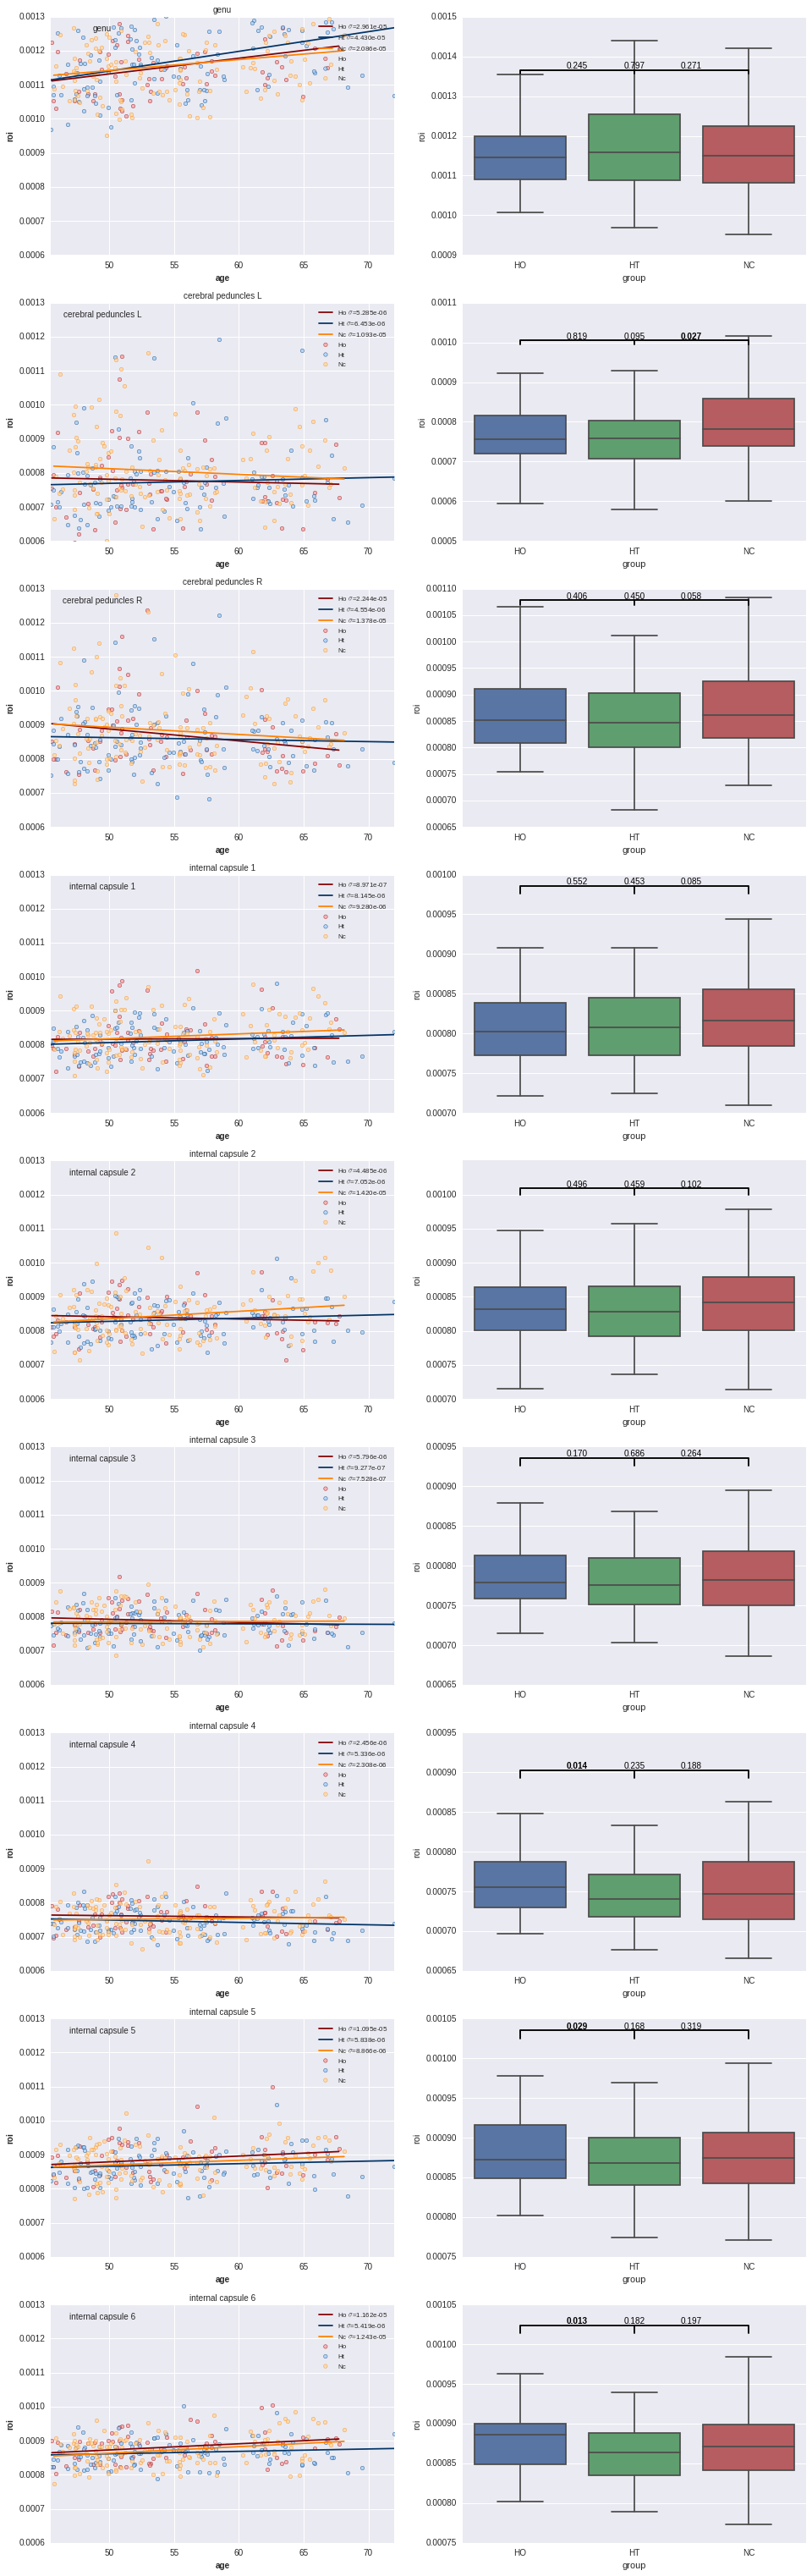

In [3]:
regions = [3, 15, 16, 17,18,19,20,21,22]
names = {3:'genu', 
         15:'cerebral peduncles L', 
         16:'cerebral peduncles R', 
         17:'internal capsule 1',
         18:'internal capsule 2',
         19:'internal capsule 3',
         20:'internal capsule 4',
         21:'internal capsule 5',
         22:'internal capsule 6'}
data = pd.read_excel('/home/grg/spm/data/covariates.xls')
data = data.set_index(data['subject'])
data = data.sort_values(['apo', 'subject'])
src = '/tmp/roivalues_labels_tbss_MD//'
filepattern = '*_stats.csv'
csvfiles = glob(osp.join(src, filepattern))
subjects = [string.atoi(e.split('/')[-1].split('_')[0]) for e in csvfiles]

to_remove = [10551, 10397, 11383, 13083, 10701, 21092] # failed DARTEL subjects

# remove wrong subjects
data = data[~data['subject'].isin(to_remove)]
for e in to_remove:
    if e in subjects:
        s = subjects.index(e)
        subjects.pop(s)
        csvfiles.pop(s)
values = collect_roivalues(3, csvfiles=csvfiles, subjects=subjects)

#data.join(values)
#poly = ols(formula='roi ~ 1 + age', data=data.join(values)).fit()
plot_regions(data, regions, csvfiles, subjects,  names=names,ylim=[0.0006,0.0013])